<a href="https://colab.research.google.com/github/Nareekan789/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

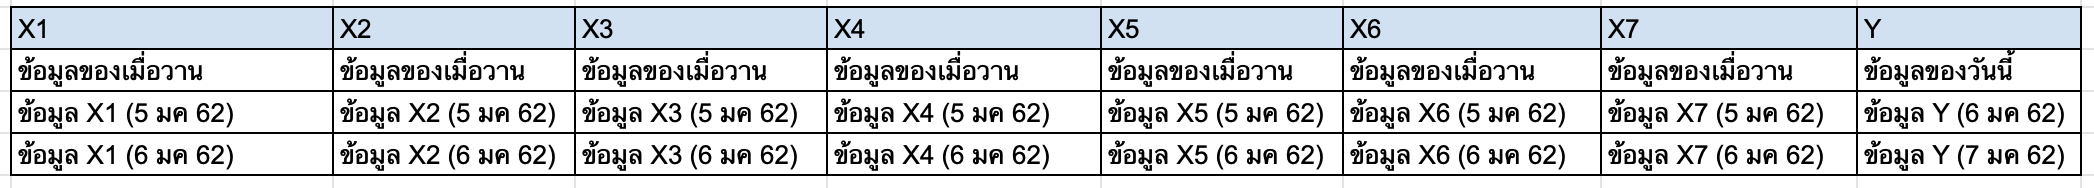

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#ขอนแก่น

##อุณหภูมิต่ำสุด

In [108]:
LowTemp_KhonKaen = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)

In [109]:
#เปลี่ยนชื่อคอลลัม
LowTemp_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
LowTemp_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LowTemp_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
LowTemp_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

In [110]:
#แยกคอลลัมปี-เดือน
LowTemp_KhonKaen['ปี'] = LowTemp_KhonKaen['ปี-เดือน'].dt.year
LowTemp_KhonKaen['เดือน'] = LowTemp_KhonKaen['ปี-เดือน'].dt.month

In [111]:
LowTemp_KhonKaen

,ที่,สถานี,ปี-เดือน,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,เฉลี่ย,ปี,เดือน
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,21.1,21.3,23.4,22,22.2,-,-,20.1,2012,2
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,22.5,22.5,23.5,24.2,24.0,23.2,21.9,...,23.2,23.3,22.6,23.7,24.3,24.3,22.7,23.0,2012,10
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,20.4,21.0,21.2,22.0,23.3,24.1,23.5,...,23.2,23.4,24.3,23,23.8,23.8,-,23.3,2012,11
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,23.2,23.1,24.0,23.7,24.1,20.5,20.9,...,16.8,20.3,21.2,20.5,20.8,21.3,15.9,21.0,2012,12
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,14.7,17.8,18.1,17.7,17.7,18.2,17.5,...,21.7,22.0,22.7,19.3,18.1,20.5,21.7,18.8,2013,1
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,19.7,21.4,20.9,22.2,22.0,22.2,22.7,...,21.4,23.4,24.4,24.6,-,-,-,21.9,2013,2


In [112]:
LowTemp_KhonKaen=LowTemp_KhonKaen.drop(columns=['ปี-เดือน']) #ลบคอลลัมปี-เดือน
LowTemp_KhonKaen=LowTemp_KhonKaen.drop(columns=['เฉลี่ย']) #ลบคอลลัมเฉลี่ย

In [113]:
LowTemp_KhonKaen

,ที่,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,ปี,เดือน
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.8,23.0,22.1,22.8,23.1,21.7,22.0,23.2,...,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.7,20.4,20.5,20.9,20.6,22.2,23.8,22.4,...,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,19.3,18.9,15.4,15.6,16.3,20.2,20.8,21.0,...,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,17.7,19.6,20.4,20.7,16.8,16.9,16.8,15.5,...,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,19.4,20.5,20.9,20.9,21.5,21.1,20.7,20.4,...,21.3,21.1,21.3,23.4,22,22.2,-,-,2012,2
5,3,381201-ขอนแก่น จ.ขอนแก่น,22.5,22.5,23.5,24.2,24.0,23.2,21.9,22.5,...,23.1,23.2,23.3,22.6,23.7,24.3,24.3,22.7,2012,10
6,4,381201-ขอนแก่น จ.ขอนแก่น,20.4,21.0,21.2,22.0,23.3,24.1,23.5,23.7,...,24.9,23.2,23.4,24.3,23,23.8,23.8,-,2012,11
7,5,381201-ขอนแก่น จ.ขอนแก่น,23.2,23.1,24.0,23.7,24.1,20.5,20.9,20.9,...,16.1,16.8,20.3,21.2,20.5,20.8,21.3,15.9,2012,12
8,6,381201-ขอนแก่น จ.ขอนแก่น,14.7,17.8,18.1,17.7,17.7,18.2,17.5,19.0,...,20.5,21.7,22.0,22.7,19.3,18.1,20.5,21.7,2013,1
9,7,381201-ขอนแก่น จ.ขอนแก่น,19.7,21.4,20.9,22.2,22.0,22.2,22.7,23.0,...,19,21.4,23.4,24.4,24.6,-,-,-,2013,2


In [114]:
LowTemp_KhonKaen1 = LowTemp_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index() #สลับวันที่จากคอลลัมเป็นแถว
#เปลี่ยนชื่อคอลลัม
LowTemp_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
LowTemp_KhonKaen1.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
LowTemp_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิต่ำสุด(เซลเซียส)
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,24.8
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,23.0
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,22.1
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,22.8
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,23.1
...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,18.2
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,-
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-


In [115]:
#เพิ่มรหัสจังหวัด
LowTemp_KhonKaen1['รหัสจังหวัด'] = len(LowTemp_KhonKaen1)*['KK']
LowTemp_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิต่ำสุด(เซลเซียส),รหัสจังหวัด
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,24.8,KK
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,23.0,KK
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,22.1,KK
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,22.8,KK
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,23.1,KK
...,...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,18.2,KK
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,-,KK
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-,KK
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-,KK


In [118]:
#ทำ index เพื่อเตรียมทำ primary key
LowTemp_KhonKaen_Key = LowTemp_KhonKaen1[['รหัสจังหวัด','สถานี','ปี','เดือน','วันที่','อุณหภูมิต่ำสุด(เซลเซียส)']].reset_index()
LowTemp_KhonKaen_Key = LowTemp_KhonKaen_Key[['index','รหัสจังหวัด','สถานี','ปี','เดือน','วันที่','อุณหภูมิต่ำสุด(เซลเซียส)']]
LowTemp_KhonKaen_Key

,index,รหัสจังหวัด,สถานี,ปี,เดือน,วันที่,อุณหภูมิต่ำสุด(เซลเซียส)
0,0,KK,381201-ขอนแก่น จ.ขอนแก่น,2011,10,1,24.8
1,1,KK,381201-ขอนแก่น จ.ขอนแก่น,2011,10,2,23.0
2,2,KK,381201-ขอนแก่น จ.ขอนแก่น,2011,10,3,22.1
3,3,KK,381201-ขอนแก่น จ.ขอนแก่น,2011,10,4,22.8
4,4,KK,381201-ขอนแก่น จ.ขอนแก่น,2011,10,5,23.1
...,...,...,...,...,...,...,...
1700,1700,KK,381201-ขอนแก่น จ.ขอนแก่น,2022,2,27,18.2
1701,1701,KK,381201-ขอนแก่น จ.ขอนแก่น,2022,2,28,-
1702,1702,KK,381201-ขอนแก่น จ.ขอนแก่น,2022,2,29,-
1703,1703,KK,381201-ขอนแก่น จ.ขอนแก่น,2022,2,30,-


In [ ]:
#ใส่ key เพื่อเตรียม merge
Cloud_SNK_newkey["จังหวัด_key"] = Cloud_SNK_newkey["รหัสจังหวัด"].astype(str)  + Cloud_SNK_newkey["index"].astype(str)
Cloud_SNK_newkey


In [ ]:
# เรียงลำดับหัวคอลลัมน์ใหม่
Cloud_SNK_newtab = Cloud_SNK_newkey[['จังหวัด_key','รหัสจังหวัด','สถานี','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
Cloud_SNK_newtab

##อุณหภูมิตุ้มแห้ง

In [12]:
DryTemp_KhonKaen = pd.read_excel("//content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
DryTemp_KhonKaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,26.8,27.4,28.3,27.9,27.4,27.3,26.5,...,27.6,27.9,27.8,27.6,27.8,28.8,29,28.3,27.5,27.6
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,25.6,26.0,26.7,27.5,28.2,28.4,28.4,...,30.0,26.8,26.0,28.2,27.9,27.2,27.5,28,-,27.9
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,28.5,28.6,28.1,26.9,28.0,25.0,25.7,...,24.8,21.7,22.9,25.3,26.5,26.5,26.9,25.3,20.4,26.2
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,20.8,23.9,24.9,23.5,23.8,24.3,24.1,...,26.1,26.3,26.3,25.4,25.1,20.1,23.2,24.1,24.1,24.0
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,24.7,25.0,24.9,26.8,27.8,28.2,29.6,...,24.6,26.0,28.0,29.7,31.0,31.0,-,-,-,27.6


In [13]:
DryTemp_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
DryTemp_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DryTemp_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
DryTemp_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

In [14]:
DryTemp_KhonKaen['ปี'] =DryTemp_KhonKaen['ปี-เดือน'].dt.year
DryTemp_KhonKaen['เดือน'] = DryTemp_KhonKaen['ปี-เดือน'].dt.month

In [15]:
DryTemp_KhonKaen=DryTemp_KhonKaen.drop(columns=['ปี-เดือน'])
DryTemp_KhonKaen=DryTemp_KhonKaen.drop(columns=['เฉลี่ย'])

In [16]:
DryTemp_KhonKaen1 = DryTemp_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DryTemp_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
DryTemp_KhonKaen1.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
DryTemp_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,27.6
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,25.6
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,25.6
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,25.8
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,24.3
...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,25.1
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,25.9
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-


##อุณหภูมิจุดน้ำค้าง

In [17]:
DewpoinTemp_KhonKaen = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
DewpoinTemp_KhonKaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,21.3,21.8,22.3,24.1,24.0,21.5,20.3,...,20.0,20.9,20.9,20.9,19.2,21.0,22.5,22.9,20.4,21.551613
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,17.7,19.0,19.3,20.2,20.4,20.9,21.3,...,21.6,21.8,22.6,22.6,22.5,21.7,22.3,22.4,-,20.880000
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,21.3,21.2,21.5,21.1,21.5,17.1,18.7,...,15.9,12.0,14.0,16.3,17.2,17.8,17,15.2,10.4,17.854839
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,12.8,14.6,15.6,14.7,15.3,15.8,15.8,...,16.8,17.2,17.1,18.9,19.5,18.6,18.8,18.3,18.5,15.874194
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,18.1,18.1,16.5,17.6,18.5,17.0,16.9,...,13.2,14.9,17.8,18.5,19.0,19.8,-,-,-,17.207143


In [18]:
DewpoinTemp_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
DewpoinTemp_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DewpoinTemp_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
DewpoinTemp_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

DewpoinTemp_KhonKaen['ปี'] =DewpoinTemp_KhonKaen['ปี-เดือน'].dt.year
DewpoinTemp_KhonKaen['เดือน'] = DewpoinTemp_KhonKaen['ปี-เดือน'].dt.month

DewpoinTemp_KhonKaen=DewpoinTemp_KhonKaen.drop(columns=['ปี-เดือน'])
DewpoinTemp_KhonKaen=DewpoinTemp_KhonKaen.drop(columns=['เฉลี่ย'])

DewpoinTemp_KhonKaen1 = DewpoinTemp_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DewpoinTemp_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
DewpoinTemp_KhonKaen1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DewpoinTemp_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,24.2
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,24.0
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,22.9
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,21.9
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,21.7
...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,15.7
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,17.5
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-


##ปริมาณน้ำฝน

In [19]:
Rainfall_KhonKaen = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx",header=4)
Rainfall_KhonKaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,0,0,0,T,0.3,0,21.9,...,0,0,0,1.1,0,0,0,0,0,34.4
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,0,0,0,0,0,0,0,...,0,0,30,0,0,0,0,0,-,30
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2,5.4,0,T,0,7.4
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,-


In [20]:
Rainfall_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rainfall_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rainfall_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Rainfall_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

Rainfall_KhonKaen['ปี'] =Rainfall_KhonKaen['ปี-เดือน'].dt.year
Rainfall_KhonKaen['เดือน'] = Rainfall_KhonKaen['ปี-เดือน'].dt.month

Rainfall_KhonKaen=Rainfall_KhonKaen.drop(columns=['ปี-เดือน'])
Rainfall_KhonKaen=Rainfall_KhonKaen.drop(columns=['เฉลี่ย'])

Rainfall_KhonKaen1 = Rainfall_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Rainfall_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Rainfall_KhonKaen1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
Rainfall_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,1.4
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,17.7
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,3
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,0
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,2.2
...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,0
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,-
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-


##จำนวนเมฆ

In [21]:
NumClouds_KhonKaen = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
NumClouds_KhonKaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,21.3,21.8,22.3,24.1,24.0,21.5,20.3,...,20.0,20.9,20.9,20.9,19.2,21.0,22.5,22.9,20.4,21.551613
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,17.7,19.0,19.3,20.2,20.4,20.9,21.3,...,21.6,21.8,22.6,22.6,22.5,21.7,22.3,22.4,-,20.880000
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,21.3,21.2,21.5,21.1,21.5,17.1,18.7,...,15.9,12.0,14.0,16.3,17.2,17.8,17,15.2,10.4,17.854839
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,12.8,14.6,15.6,14.7,15.3,15.8,15.8,...,16.8,17.2,17.1,18.9,19.5,18.6,18.8,18.3,18.5,15.874194
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,18.1,18.1,16.5,17.6,18.5,17.0,16.9,...,13.2,14.9,17.8,18.5,19.0,19.8,-,-,-,17.207143


In [22]:
NumClouds_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
NumClouds_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
NumClouds_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
NumClouds_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

NumClouds_KhonKaen['ปี'] =NumClouds_KhonKaen['ปี-เดือน'].dt.year
NumClouds_KhonKaen['เดือน'] = NumClouds_KhonKaen['ปี-เดือน'].dt.month

NumClouds_KhonKaen=NumClouds_KhonKaen.drop(columns=['ปี-เดือน'])
NumClouds_KhonKaen=NumClouds_KhonKaen.drop(columns=['เฉลี่ย'])

NumClouds_KhonKaen1 = NumClouds_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
NumClouds_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
NumClouds_KhonKaen1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
NumClouds_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,จำนวนเมฆ(10ส่วน)
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,24.2
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,24.0
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,22.9
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,21.9
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,21.7
...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,15.7
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,17.5
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-


##ความเร็วลม

In [23]:
Wind_KhonKaen = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx",header=4)
Wind_KhonKaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,2,1,2,2,5,7,...,6,4,2,4,5,2,2,3,5,3.225806
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3,2,0,2,2,3,2,...,2,3,3,1,3,3,3,3,-,2.633333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,2,3,3,3,4,4,4,...,5,5,5,5,5,4,3,5,6,3.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,3,3,4,4,3,3,3,...,2,2,4,3,5,4,4,3,5,3.483871
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,4,5,4,3,2,2,...,9,6,3,4,4,2,3,3,-,3.633333


In [24]:
Wind_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Wind_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Wind_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Wind_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

Wind_KhonKaen['ปี'] =Wind_KhonKaen['ปี-เดือน'].dt.year
Wind_KhonKaen['เดือน'] = Wind_KhonKaen['ปี-เดือน'].dt.month

Wind_KhonKaen=Wind_KhonKaen.drop(columns=['ปี-เดือน'])
Wind_KhonKaen=Wind_KhonKaen.drop(columns=['เฉลี่ย'])

Wind_KhonKaen1 = Wind_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Wind_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Wind_KhonKaen1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
Wind_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,ความเร็วลม(นอต)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,3
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,2
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,3
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,2
...,...,...,...,...,...,...
1700,353301-เลย สกษ. จ.เลย,2,2022,2,27,2
1701,353301-เลย สกษ. จ.เลย,2,2022,2,28,2
1702,353301-เลย สกษ. จ.เลย,2,2022,2,29,-
1703,353301-เลย สกษ. จ.เลย,2,2022,2,30,-


##ความชื้นสัมพัทธ์

In [25]:
RelHum_KhonKaen = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
RelHum_KhonKaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,73,73,72,81,83,73,70,...,65,68,69,69,62,64,69,74,68,72
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,64,67,67,66,65,65,67,...,63,75,82,75,73,73,75,74,-,68
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,68,66,69,71,69,63,67,...,59,56,60,59,58,61,57,55,54,62
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,62,58,59,60,62,61,62,...,59,59,59,67,71,91,78,71,72,63
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,69,66,62,58,59,53,50,...,50,52,56,53,51,54,-,-,-,55


In [26]:
RelHum_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
RelHum_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RelHum_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
RelHum_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

RelHum_KhonKaen['ปี'] =RelHum_KhonKaen['ปี-เดือน'].dt.year
RelHum_KhonKaen['เดือน'] =RelHum_KhonKaen['ปี-เดือน'].dt.month

RelHum_KhonKaen=RelHum_KhonKaen.drop(columns=['ปี-เดือน'])
RelHum_KhonKaen=RelHum_KhonKaen.drop(columns=['เฉลี่ย'])

RelHum_KhonKaen1 = RelHum_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
RelHum_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
RelHum_KhonKaen1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RelHum_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,ความชื้นสัมพัทธ์(%)
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,83
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,92
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,86
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,80
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,86
...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,58
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,62
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-


##ความกดอากาศ

In [27]:
Atmos_KhonKaen = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
Atmos_KhonKaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,-,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,-,-,-,1011.207500


In [28]:
Atmos_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Atmos_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Atmos_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Atmos_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

Atmos_KhonKaen['ปี'] =Atmos_KhonKaen['ปี-เดือน'].dt.year
Atmos_KhonKaen['เดือน'] =Atmos_KhonKaen['ปี-เดือน'].dt.month

Atmos_KhonKaen=Atmos_KhonKaen.drop(columns=['ปี-เดือน'])
Atmos_KhonKaen=Atmos_KhonKaen.drop(columns=['เฉลี่ย'])

Atmos_KhonKaen1 = Atmos_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Atmos_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Atmos_KhonKaen1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
Atmos_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,ความชื้นสัมพัทธ์(%)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.47
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.65
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.49
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.28
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.88
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1014.37
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.04
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98


#Nakhon Phanom

##อุณหภูมิต่ำสุด

In [29]:
LowTemp_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx",header=4)
LowTemp_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19,-,-,19.2
5,3,357201-นครพนม จ.นครพนม,2012-10-01,20.6,22.6,23.6,24.5,24.2,23.0,23.2,...,21.6,22.5,22.5,22.9,21.5,24.1,24.7,24.4,22,23.0
6,4,357201-นครพนม จ.นครพนม,2012-11-01,19.2,19.6,20.3,22.6,22,22.5,22.5,...,25.5,24.4,23.8,23.4,22.7,21.5,23.5,22.8,-,22.7
7,5,357201-นครพนม จ.นครพนม,2012-12-01,25.0,24.6,21.2,22.6,22.3,19.0,19.3,...,21.4,14.4,14.9,20.1,19.6,19.4,19.9,21.6,14.8,20.0
8,6,357201-นครพนม จ.นครพนม,2013-01-01,12.5,14.8,18.0,15.4,14.9,19.5,14.6,...,20.7,17.8,22.1,20.6,22.0,18.3,16,17.8,20.6,17.5
9,7,357201-นครพนม จ.นครพนม,2013-02-01,18.3,19.6,19.2,20.5,20,19.7,20.9,...,16.4,16.6,18,21.4,23.6,23.4,-,-,-,20.3


In [30]:
LowTemp_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
LowTemp_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LowTemp_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
LowTemp_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

LowTemp_NakhonPhanom['ปี'] =LowTemp_NakhonPhanom['ปี-เดือน'].dt.year
LowTemp_NakhonPhanom['เดือน'] = LowTemp_NakhonPhanom['ปี-เดือน'].dt.month

LowTemp_NakhonPhanom=LowTemp_NakhonPhanom.drop(columns=['ปี-เดือน'])
LowTemp_NakhonPhanom=LowTemp_NakhonPhanom.drop(columns=['เฉลี่ย'])

LowTemp_NakhonPhanom1 = LowTemp_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
LowTemp_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
LowTemp_NakhonPhanom1.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
LowTemp_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิต่ำสุด(เซลเซียส)
0,357201-นครพนม จ.นครพนม,1,2011,10,1,25.0
1,357201-นครพนม จ.นครพนม,1,2011,10,2,23.4
2,357201-นครพนม จ.นครพนม,1,2011,10,3,22.2
3,357201-นครพนม จ.นครพนม,1,2011,10,4,20.6
4,357201-นครพนม จ.นครพนม,1,2011,10,5,21.1
...,...,...,...,...,...,...
1700,357201-นครพนม จ.นครพนม,2,2022,2,27,18.1
1701,357201-นครพนม จ.นครพนม,2,2022,2,28,16
1702,357201-นครพนม จ.นครพนม,2,2022,2,29,-
1703,357201-นครพนม จ.นครพนม,2,2022,2,30,-


##อุณหภูมิตุ้มแห้ง

In [31]:
DryTemp_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
DryTemp_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,-,-,25.1
5,3,357201-นครพนม จ.นครพนม,2012-10-01,26.3,27.4,28.0,28.1,27.9,27.8,26.7,...,27.3,27.8,28.6,27.9,27.4,27.3,28.5,27.6,25.8,27.6
6,4,357201-นครพนม จ.นครพนม,2012-11-01,24.5,25.2,26.5,27.5,27.5,28.1,28.4,...,30.3,27.7,27.1,28.4,27.1,27.5,27,27.9,-,27.6
7,5,357201-นครพนม จ.นครพนม,2012-12-01,28.7,28.0,26.0,26.3,25.8,24.2,24.3,...,23.2,20.1,22.3,25.0,25.4,25.6,27.1,22.2,18.7,25.2
8,6,357201-นครพนม จ.นครพนม,2013-01-01,20.1,22.4,23.5,21.2,22.0,23.4,22.0,...,25.2,25.0,25.4,24.0,23.8,20.5,23.1,24.6,23.7,22.9
9,7,357201-นครพนม จ.นครพนม,2013-02-01,24.5,25.6,23.6,26.4,27.4,27.1,27.6,...,22.8,24.4,26.9,28.4,30.2,29.4,-,-,-,26.6


In [32]:
DryTemp_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
DryTemp_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DryTemp_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
DryTemp_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

DryTemp_NakhonPhanom['ปี'] =DryTemp_NakhonPhanom['ปี-เดือน'].dt.year
DryTemp_NakhonPhanom['เดือน'] = DryTemp_NakhonPhanom['ปี-เดือน'].dt.month

DryTemp_NakhonPhanom=DryTemp_NakhonPhanom.drop(columns=['ปี-เดือน'])
DryTemp_NakhonPhanom=DryTemp_NakhonPhanom.drop(columns=['เฉลี่ย'])

DryTemp_NakhonPhanom1 =DryTemp_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DryTemp_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
DryTemp_NakhonPhanom1.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
DryTemp_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,357201-นครพนม จ.นครพนม,1,2011,10,1,25.9
1,357201-นครพนม จ.นครพนม,1,2011,10,2,26.1
2,357201-นครพนม จ.นครพนม,1,2011,10,3,25.3
3,357201-นครพนม จ.นครพนม,1,2011,10,4,24.7
4,357201-นครพนม จ.นครพนม,1,2011,10,5,23.1
...,...,...,...,...,...,...
1700,357201-นครพนม จ.นครพนม,2,2022,2,27,24.1
1701,357201-นครพนม จ.นครพนม,2,2022,2,28,24.0
1702,357201-นครพนม จ.นครพนม,2,2022,2,29,-
1703,357201-นครพนม จ.นครพนม,2,2022,2,30,-


##อุณหภูมิน้ำค้าง

In [33]:
DewpoinTemp_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
DewpoinTemp_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667
5,3,357201-นครพนม จ.นครพนม,2012-10-01,19.5,21.5,22.4,23.8,24.0,20.4,20.9,...,20.6,21.1,20.5,20.7,20.2,22.0,23.4,22.7,18.5,21.261290
6,4,357201-นครพนม จ.นครพนม,2012-11-01,17.3,18.4,20.3,21.0,20.8,20.8,21.4,...,22.7,22.8,23.2,22.7,19.2,20.8,23.4,23.2,-,21.163333
7,5,357201-นครพนม จ.นครพนม,2012-12-01,23.6,22.5,19.9,20.2,19.7,15.9,17.9,...,13.1,11.9,14.8,17.3,18.2,18.7,18.3,12.3,9.5,17.951613
8,6,357201-นครพนม จ.นครพนม,2013-01-01,12.1,15.3,15.9,14.7,15.5,14.8,14.9,...,16.1,17.0,17.1,18.5,16.8,17.2,16.4,16.9,18,15.345161
9,7,357201-นครพนม จ.นครพนม,2013-02-01,18.5,17.1,17.7,19.4,18.9,18.6,18.2,...,13.5,15.6,18.2,19.2,20.6,20.9,-,-,-,17.592857


In [34]:
DewpoinTemp_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
DewpoinTemp_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DewpoinTemp_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
DewpoinTemp_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

DewpoinTemp_NakhonPhanom['ปี'] =DewpoinTemp_NakhonPhanom['ปี-เดือน'].dt.year
DewpoinTemp_NakhonPhanom['เดือน'] = DewpoinTemp_NakhonPhanom['ปี-เดือน'].dt.month

DewpoinTemp_NakhonPhanom=DewpoinTemp_NakhonPhanom.drop(columns=['ปี-เดือน'])
DewpoinTemp_NakhonPhanom=DewpoinTemp_NakhonPhanom.drop(columns=['เฉลี่ย'])

DewpoinTemp_NakhonPhanom1 =DryTemp_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DewpoinTemp_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
DewpoinTemp_NakhonPhanom1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DewpoinTemp_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,357201-นครพนม จ.นครพนม,1,2011,10,1,25.9
1,357201-นครพนม จ.นครพนม,1,2011,10,2,26.1
2,357201-นครพนม จ.นครพนม,1,2011,10,3,25.3
3,357201-นครพนม จ.นครพนม,1,2011,10,4,24.7
4,357201-นครพนม จ.นครพนม,1,2011,10,5,23.1
...,...,...,...,...,...,...
1700,357201-นครพนม จ.นครพนม,2,2022,2,27,24.1
1701,357201-นครพนม จ.นครพนม,2,2022,2,28,24.0
1702,357201-นครพนม จ.นครพนม,2,2022,2,29,-
1703,357201-นครพนม จ.นครพนม,2,2022,2,30,-


##ปริมาณน้ำฝน

In [35]:
Rainfall_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx",header=4)
Rainfall_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2
5,3,357201-นครพนม จ.นครพนม,2012-10-01,0,0,0,19.8,3,0,0.4,...,0,0,0,0,0,0.5,0,3.8,0,28.2
6,4,357201-นครพนม จ.นครพนม,2012-11-01,0,0,0,0,0.2,0,0,...,0,T,0.5,0,0,11,0,T,-,11.7
7,5,357201-นครพนม จ.นครพนม,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
8,6,357201-นครพนม จ.นครพนม,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,T,0.5,T,0,0,T,0.5
9,7,357201-นครพนม จ.นครพนม,2013-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,-,-,-,T


In [36]:
Rainfall_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rainfall_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rainfall_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Rainfall_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

Rainfall_NakhonPhanom['ปี'] =Rainfall_NakhonPhanom['ปี-เดือน'].dt.year
Rainfall_NakhonPhanom['เดือน'] = Rainfall_NakhonPhanom['ปี-เดือน'].dt.month

Rainfall_NakhonPhanom=Rainfall_NakhonPhanom.drop(columns=['ปี-เดือน'])
Rainfall_NakhonPhanom=Rainfall_NakhonPhanom.drop(columns=['เฉลี่ย'])

Rainfall_NakhonPhanom1 =Rainfall_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Rainfall_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Rainfall_NakhonPhanom1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
Rainfall_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,357201-นครพนม จ.นครพนม,1,2011,10,1,17
1,357201-นครพนม จ.นครพนม,1,2011,10,2,0.3
2,357201-นครพนม จ.นครพนม,1,2011,10,3,0
3,357201-นครพนม จ.นครพนม,1,2011,10,4,0.3
4,357201-นครพนม จ.นครพนม,1,2011,10,5,1.9
...,...,...,...,...,...,...
1700,357201-นครพนม จ.นครพนม,2,2022,2,27,0
1701,357201-นครพนม จ.นครพนม,2,2022,2,28,0
1702,357201-นครพนม จ.นครพนม,2,2022,2,29,-
1703,357201-นครพนม จ.นครพนม,2,2022,2,30,-


##จำนวนเมฆ

In [37]:
NumClouds_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx",header=4)
NumClouds_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,5,3,4,7,7,5,6,...,3,3,2,3,3,8,6,5,3,4.129032
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3,3,2,3,4,4,2,...,4,7,5,4,3,5,8,4,-,3.966667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,5,4,6,6,4,3,4,...,4,2,6,9,3,2,2,1,4,3.225806
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,4,3,2,6,3,4,5,...,0,3,5,7,7,9,3,5,6,4.000000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,3,7,7,5,2,2,2,...,4,3,3,3,4,4,3,3,-,3.166667


In [38]:
NumClouds_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
NumClouds_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
NumClouds_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
NumClouds_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

NumClouds_NakhonPhanom['ปี'] =NumClouds_NakhonPhanom['ปี-เดือน'].dt.year
NumClouds_NakhonPhanom['เดือน'] = NumClouds_NakhonPhanom['ปี-เดือน'].dt.month

NumClouds_NakhonPhanom=NumClouds_NakhonPhanom.drop(columns=['ปี-เดือน'])
NumClouds_NakhonPhanom=NumClouds_NakhonPhanom.drop(columns=['เฉลี่ย'])

NumClouds_NakhonPhanom1 =NumClouds_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
NumClouds_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
NumClouds_NakhonPhanom1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
NumClouds_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,จำนวนเมฆ(10ส่วน)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,10
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,7
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,8
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,8
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,10
...,...,...,...,...,...,...
1700,353301-เลย สกษ. จ.เลย,2,2022,2,27,1
1701,353301-เลย สกษ. จ.เลย,2,2022,2,28,0
1702,353301-เลย สกษ. จ.เลย,2,2022,2,29,-
1703,353301-เลย สกษ. จ.เลย,2,2022,2,30,-


##ความเร็วลม

In [39]:
Wind_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx",header=4)
Wind_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,1,2,2,2,2,2,...,3,1,2,2,2,1,1,1,3,1.774194
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,2,2,2,2,0,...,2,1,1,1,3,1,2,1,-,1.571429
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,1,2,3,1,2,4,3,...,5,3,2,2,3,3,3,5,4,2.193548
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,1,4,2,1,2,2,...,2,0,3,2,3,0,1,1,2,1.900000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,1,1,2,1,2,3,...,3,2,2,2,2,3,3,3,-,2.233333


In [40]:
Wind_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Wind_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Wind_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Wind_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

Wind_NakhonPhanom['ปี'] =Wind_NakhonPhanom['ปี-เดือน'].dt.year
Wind_NakhonPhanom['เดือน'] = Wind_NakhonPhanom['ปี-เดือน'].dt.month

Wind_NakhonPhanom=Wind_NakhonPhanom.drop(columns=['ปี-เดือน'])
Wind_NakhonPhanom=Wind_NakhonPhanom.drop(columns=['เฉลี่ย'])

Wind_NakhonPhanom1 =Wind_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Wind_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Wind_NakhonPhanom1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
Wind_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,ความเร็วลม(นอต)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,1
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,1
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,2
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,1
...,...,...,...,...,...,...
1700,353301-เลย สกษ. จ.เลย,2,2022,2,27,2
1701,353301-เลย สกษ. จ.เลย,2,2022,2,28,1
1702,353301-เลย สกษ. จ.เลย,2,2022,2,29,-
1703,353301-เลย สกษ. จ.เลย,2,2022,2,30,-


##ความชื้นสัมพัทธ์

In [41]:
RelHum_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
RelHum_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65
5,3,357201-นครพนม จ.นครพนม,2012-10-01,68,72,74,79,81,66,72,...,69,69,64,66,67,73,75,76,66,70
6,4,357201-นครพนม จ.นครพนม,2012-11-01,67,69,71,70,69,67,68,...,66,76,80,74,63,69,82,78,-,70
7,5,357201-นครพนม จ.นครพนม,2012-12-01,76,73,70,70,70,61,68,...,54,61,65,64,67,68,62,54,56,67
8,6,357201-นครพนม จ.นครพนม,2013-01-01,62,67,64,69,69,60,67,...,59,64,61,72,66,82,70,64,71,65
9,7,357201-นครพนม จ.นครพนม,2013-02-01,72,62,71,69,64,63,61,...,58,60,62,60,59,62,-,-,-,61


In [42]:
RelHum_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
RelHum_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RelHum_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
RelHum_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

RelHum_NakhonPhanom['ปี'] =RelHum_NakhonPhanom['ปี-เดือน'].dt.year
RelHum_NakhonPhanom['เดือน'] =RelHum_NakhonPhanom['ปี-เดือน'].dt.month

RelHum_NakhonPhanom=RelHum_NakhonPhanom.drop(columns=['ปี-เดือน'])
RelHum_NakhonPhanom=RelHum_NakhonPhanom.drop(columns=['เฉลี่ย'])

RelHum_NakhonPhanom1 =RelHum_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
RelHum_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
RelHum_NakhonPhanom1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RelHum_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,ความชื้นสัมพัทธ์(%)
0,357201-นครพนม จ.นครพนม,1,2011,10,1,95
1,357201-นครพนม จ.นครพนม,1,2011,10,2,84
2,357201-นครพนม จ.นครพนม,1,2011,10,3,74
3,357201-นครพนม จ.นครพนม,1,2011,10,4,72
4,357201-นครพนม จ.นครพนม,1,2011,10,5,87
...,...,...,...,...,...,...
1700,357201-นครพนม จ.นครพนม,2,2022,2,27,52
1701,357201-นครพนม จ.นครพนม,2,2022,2,28,60
1702,357201-นครพนม จ.นครพนม,2,2022,2,29,-
1703,357201-นครพนม จ.นครพนม,2,2022,2,30,-


##ความกดอากาศ

In [43]:
Atmos_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
Atmos_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.86,1011.24,1008.82,1007.46,1008.65,1010.53,1010.41,...,1011.63,1010.67,1010.17,1009.78,1008.53,1008.22,1008.94,1009.54,1012.76,1010.840323
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.26,1011.77,1010.84,1010.77,1011.02,1011.49,1010.06,...,1008.87,1010.93,1011.45,1011.22,1011.43,1010.70,1010.66,1009.89,-,1010.984000
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.12,1010.89,1011.93,1011.30,1012.01,1013.16,1012.68,...,1016.81,1017.31,1014.43,1012.45,1011.32,1010.47,1010.69,1014.48,1016.22,1012.551935
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.52,1014.01,1015.36,1014.22,1012.47,1013.17,1013.46,...,1014.11,1013.65,1013.57,1013.25,1015.31,1016.70,1015.92,1015.57,1016.14,1014.798710
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.63,1014.87,1014.45,1014.43,1013.88,1011.52,1008.45,...,1017.17,1014.55,1012.39,1011.08,1008.62,1007.56,-,-,-,1012.171429


In [44]:
Atmos_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Atmos_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Atmos_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Atmos_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

Atmos_NakhonPhanom['ปี'] =Atmos_NakhonPhanom['ปี-เดือน'].dt.year
Atmos_NakhonPhanom['เดือน'] =Atmos_NakhonPhanom['ปี-เดือน'].dt.month

Atmos_NakhonPhanom=Atmos_NakhonPhanom.drop(columns=['ปี-เดือน'])
Atmos_NakhonPhanom=Atmos_NakhonPhanom.drop(columns=['เฉลี่ย'])

Atmos_NakhonPhanom1 =Atmos_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Atmos_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Atmos_NakhonPhanom1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
Atmos_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,ความกดอากาศ(%)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1006.3
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1007.38
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1008.07
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.44
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1010.51
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1016.43
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.53
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98


#สกลนคร

##อุณหภูมิต่ำสุด

In [45]:
LowTemp_Sakon= pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx",header=4)
LowTemp_Sakon

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20,19.9,19.6,-,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20,19.4,20,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,-,-,19.0
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,22.5,23.1,23.7,24.8,25.1,23.8,23.5,...,22.5,23.0,22.6,23.0,21.5,24.4,25.2,24.7,22.8,23.4
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,19.0,20.0,20.6,22.3,22.4,22.0,23.0,...,25.4,25.5,24.5,23.5,22.9,22.4,24.7,22.4,-,22.9
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,24.4,23.5,22.0,22.5,23.4,19.5,19.7,...,20.4,14.8,14.8,19.5,19.9,19.8,19.5,21.3,14,20.0
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,12.9,15.4,18.9,15.6,16.5,16.5,16.0,...,19.8,19.3,21.0,21.2,20.9,18.5,15.9,18.2,21.7,17.4
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,18.2,20.3,20.0,21.0,20.4,19.5,21.4,...,17.1,16.8,19.7,22.0,23.6,24.1,-,-,-,20.3


In [52]:
LowTemp_Sakon.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
LowTemp_Sakon.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LowTemp_Sakon.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
LowTemp_Sakon.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

LowTemp_Sakon['ปี'] =LowTemp_Sakon['ปี-เดือน'].dt.year
LowTemp_Sakon['เดือน'] =LowTemp_Sakon['ปี-เดือน'].dt.month

LowTemp_Sakon=LowTemp_Sakon.drop(columns=['ปี-เดือน'])
LowTemp_Sakon=LowTemp_Sakon.drop(columns=['เฉลี่ย'])

LowTemp_Sakon1 =LowTemp_Sakon.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
LowTemp_Sakon1.rename(columns={'level_4' : 'วันที่'},inplace=True)
LowTemp_Sakon1.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
LowTemp_Sakon1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิต่ำสุด(เซลเซียส)
0,356201-สกลนคร จ.สกลนคร,1,2011,10,1,24.5
1,356201-สกลนคร จ.สกลนคร,1,2011,10,2,23.1
2,356201-สกลนคร จ.สกลนคร,1,2011,10,3,22.6
3,356201-สกลนคร จ.สกลนคร,1,2011,10,4,21.8
4,356201-สกลนคร จ.สกลนคร,1,2011,10,5,22.5
...,...,...,...,...,...,...
1700,356201-สกลนคร จ.สกลนคร,2,2022,2,27,16.1
1701,356201-สกลนคร จ.สกลนคร,2,2022,2,28,-
1702,356201-สกลนคร จ.สกลนคร,2,2022,2,29,-
1703,356201-สกลนคร จ.สกลนคร,2,2022,2,30,-


##อุณหภูมิตุ้มแห้ง

In [48]:
DryTemp_Sakon = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx",header=4)
DryTemp_Sakon

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,-,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,-,-,25.0
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,27.3,27.4,27.8,27.6,28.4,27.9,26.4,...,27.1,27.9,28.0,27.7,27.6,28.7,29.1,28,26.4,27.6
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,25.0,25.2,26.5,27.3,27.5,28.0,28.3,...,30.0,27.8,27.6,28.4,27.3,26.8,26.7,27.7,-,27.5
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,28.4,28.1,26.6,25.9,26.6,23.8,24.6,...,23.0,19.8,21.8,24.4,25.6,25.3,26.1,22.2,18.1,25.1
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,19.5,22.2,23.5,21.4,22.6,22.3,22.4,...,25.0,25.1,25.1,23.9,23.5,19.9,22.7,24.1,23.3,22.6
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,24.2,24.7,23.7,26.1,26.9,27.6,28.2,...,22.7,24.3,26.6,28.6,30.0,30.4,-,-,-,26.4


In [53]:
DryTemp_Sakon.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
DryTemp_Sakon.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DryTemp_Sakon.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
DryTemp_Sakon.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

DryTemp_Sakon['ปี'] =DryTemp_Sakon['ปี-เดือน'].dt.year
DryTemp_Sakon['เดือน'] =DryTemp_Sakon['ปี-เดือน'].dt.month

DryTemp_Sakon=DryTemp_Sakon.drop(columns=['ปี-เดือน'])
DryTemp_Sakon=DryTemp_Sakon.drop(columns=['เฉลี่ย'])

DryTemp_Sakon1 =DryTemp_Sakon.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DryTemp_Sakon1.rename(columns={'level_4' : 'วันที่'},inplace=True)
DryTemp_Sakon1.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
DryTemp_Sakon1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,356201-สกลนคร จ.สกลนคร,1,2011,10,1,26.9
1,356201-สกลนคร จ.สกลนคร,1,2011,10,2,25.9
2,356201-สกลนคร จ.สกลนคร,1,2011,10,3,25.7
3,356201-สกลนคร จ.สกลนคร,1,2011,10,4,25.2
4,356201-สกลนคร จ.สกลนคร,1,2011,10,5,23.6
...,...,...,...,...,...,...
1700,356201-สกลนคร จ.สกลนคร,2,2022,2,27,23.2
1701,356201-สกลนคร จ.สกลนคร,2,2022,2,28,24.4
1702,356201-สกลนคร จ.สกลนคร,2,2022,2,29,-
1703,356201-สกลนคร จ.สกลนคร,2,2022,2,30,-


##อุณหภูมิน้ำค้าง

In [49]:
DewpoinTemp_Sakon = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx",header=4)
DewpoinTemp_Sakon

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,-,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16,16.2,15.5,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,-,17.233333
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,19.7,21.8,22.1,24.2,24.4,21.2,20.4,...,20.7,20.8,20.7,21.3,20.2,21.1,23.2,22.9,18.8,21.322581
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,16.9,18.1,19.9,20.6,20.4,20.6,21.0,...,22.2,22.1,22.4,22.1,19.8,20.5,23.7,23.1,-,20.860000
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,23.1,22.1,20.1,20.0,20.5,17.0,17.9,...,14.5,11.8,14.0,17.1,18.5,18.7,18.4,13.9,9.7,17.993548
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,12.2,15.1,15.9,14.8,15.5,14.9,15.2,...,16.4,16.9,17.5,18.8,18.1,16.7,16.7,17.2,17.7,15.474194
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,18.2,17.1,17.5,19.4,18.8,16.8,17.5,...,13.1,15.0,18.0,18.9,19.8,20.3,-,-,-,17.271429


In [54]:
DewpoinTemp_Sakon.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
DewpoinTemp_Sakon.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DewpoinTemp_Sakon.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
DewpoinTemp_Sakon.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

DewpoinTemp_Sakon['ปี'] =DewpoinTemp_Sakon['ปี-เดือน'].dt.year
DewpoinTemp_Sakon['เดือน'] =DewpoinTemp_Sakon['ปี-เดือน'].dt.month

DewpoinTemp_Sakon=DewpoinTemp_Sakon.drop(columns=['ปี-เดือน'])
DewpoinTemp_Sakon=DewpoinTemp_Sakon.drop(columns=['เฉลี่ย'])

DewpoinTemp_Sakon1 =DewpoinTemp_Sakon.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DewpoinTemp_Sakon1.rename(columns={'level_4' : 'วันที่'},inplace=True)
DewpoinTemp_Sakon1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DewpoinTemp_Sakon1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,356201-สกลนคร จ.สกลนคร,1,2011,10,1,24.5
1,356201-สกลนคร จ.สกลนคร,1,2011,10,2,23.6
2,356201-สกลนคร จ.สกลนคร,1,2011,10,3,21.1
3,356201-สกลนคร จ.สกลนคร,1,2011,10,4,20.0
4,356201-สกลนคร จ.สกลนคร,1,2011,10,5,21.2
...,...,...,...,...,...,...
1700,356201-สกลนคร จ.สกลนคร,2,2022,2,27,15.7
1701,356201-สกลนคร จ.สกลนคร,2,2022,2,28,17.3
1702,356201-สกลนคร จ.สกลนคร,2,2022,2,29,-
1703,356201-สกลนคร จ.สกลนคร,2,2022,2,30,-


##ปริมาณน้ำฝน

In [57]:
Rainfall_Sakon = pd.read_excel("//content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx",header=4)
Rainfall_Sakon

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0,T,5.5,0.3,0,...,0,0,0,0,0,0,1,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0,0,0,0,T,T,2.8,...,0,0,0,0,0,0,0,0,-,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0,0,0,0,0,0,0,...,0.9,0,0,0,0,0,0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0,0,0,0,0,0,0,...,0,0,0,0.4,5.6,0,0,-,-,6
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,0,0,0,6.5,2.4,0,3.9,...,0,0,0,0.1,0,0,0,0,0,13.1
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,0,0,0,0,0,0,0,...,0,T,0,0,0,0.9,2.3,16.1,-,21.8
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0.5,T,0,0,T,0.5
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,0,0,0.6,0,0,0,0,...,0,0,0,0,0,0,-,-,-,0.6


In [58]:
Rainfall_Sakon.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rainfall_Sakon.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rainfall_Sakon.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Rainfall_Sakon.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

Rainfall_Sakon['ปี'] =Rainfall_Sakon['ปี-เดือน'].dt.year
Rainfall_Sakon['เดือน'] =Rainfall_Sakon['ปี-เดือน'].dt.month

Rainfall_Sakon=Rainfall_Sakon.drop(columns=['ปี-เดือน'])
Rainfall_Sakon=Rainfall_Sakon.drop(columns=['เฉลี่ย'])

Rainfall_Sakon1 =Rainfall_Sakon.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Rainfall_Sakon1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Rainfall_Sakon1.rename(columns={0 : 'ปริมาณฝน(มิลลิเมตร)'},inplace=True)
Rainfall_Sakon1

,สถานี,ที่,ปี,เดือน,วันที่,ปริมาณฝน(มิลลิเมตร)
0,356201-สกลนคร จ.สกลนคร,1,2011,10,1,84.8
1,356201-สกลนคร จ.สกลนคร,1,2011,10,2,28.1
2,356201-สกลนคร จ.สกลนคร,1,2011,10,3,0
3,356201-สกลนคร จ.สกลนคร,1,2011,10,4,T
4,356201-สกลนคร จ.สกลนคร,1,2011,10,5,5.5
...,...,...,...,...,...,...
1700,356201-สกลนคร จ.สกลนคร,2,2022,2,27,0
1701,356201-สกลนคร จ.สกลนคร,2,2022,2,28,-
1702,356201-สกลนคร จ.สกลนคร,2,2022,2,29,-
1703,356201-สกลนคร จ.สกลนคร,2,2022,2,30,-


##จำนวนเมฆ

In [64]:
NumClouds_Sakon = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx",header=4)
NumClouds_Sakon

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,9,7,7,9,10,8,...,2,1,2,1,1,3,3,1,4,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,0,0,1,3,7,8,...,4,3,1,1,1,1,1,0,-,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,1,2,2,2,6,6,...,3,2,-,0,0,0,0,1,-,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0,0,4,3,2,0,1,...,4,1,0,3,0,1,4,7,8,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4,4,8,5,1,0,0,...,-,-,-,1,6,4,0,0,-,2.142857
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,0,0,1,5,6,4,7,...,1,2,1,2,2,4,6,5,1,2.419355
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,1,3,1,2,1,...,4,8,5,2,1,6,7,5,-,2.933333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,3,3,5,5,2,2,3,...,3,1,6,7,3,1,0,1,4,2.137931
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,1,1,5,0,2,2,...,-,1,2,5,6,9,2,6,9,2.928571
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,6,8,5,1,0,0,...,3,1,2,2,1,1,3,3,-,2.074074


In [65]:
NumClouds_Sakon.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
NumClouds_Sakon.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
NumClouds_Sakon.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
NumClouds_Sakon.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
NumClouds_Sakon['ปี'] =NumClouds_Sakon['ปี-เดือน'].dt.year
NumClouds_Sakon['เดือน'] =NumClouds_Sakon['ปี-เดือน'].dt.month

NumClouds_Sakon=NumClouds_Sakon.drop(columns=['ปี-เดือน'])
NumClouds_Sakon=NumClouds_Sakon.drop(columns=['เฉลี่ย'])

NumClouds_Sakon1 =NumClouds_Sakon.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
NumClouds_Sakon1.rename(columns={'level_4' : 'วันที่'},inplace=True)
NumClouds_Sakon1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
NumClouds_Sakon1

,สถานี,ที่,ปี,เดือน,วันที่,จำนวนเมฆ(10ส่วน)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,9
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,9
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,7
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,7
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,9
...,...,...,...,...,...,...
1700,353301-เลย สกษ. จ.เลย,2,2022,2,27,3
1701,353301-เลย สกษ. จ.เลย,2,2022,2,28,0
1702,353301-เลย สกษ. จ.เลย,2,2022,2,29,1
1703,353301-เลย สกษ. จ.เลย,2,2022,2,30,1


##ความเร็วลม

In [60]:
Wind_Sakon = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx",header=4)
Wind_Sakon

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,2,2,1,5,3,2,...,3,2,1,2,1,1,2,3,4,1.967742
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,2,3,3,1,1,...,2,3,2,2,4,4,2,2,-,2.266667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,1,1,3,2,2,3,2,...,5,3,3,1,2,2,2,5,4,2.290323
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,1,4,2,1,2,2,...,2,0,3,2,3,0,1,1,2,1.900000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,1,1,2,1,2,3,...,3,2,2,2,2,3,3,3,-,2.233333


In [66]:
Wind_Sakon.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Wind_Sakon.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Wind_Sakon.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Wind_Sakon.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
Wind_Sakon['ปี'] =Wind_Sakon['ปี-เดือน'].dt.year
Wind_Sakon['เดือน'] =Wind_Sakon['ปี-เดือน'].dt.month

Wind_Sakon=Wind_Sakon.drop(columns=['ปี-เดือน'])
Wind_Sakon=Wind_Sakon.drop(columns=['เฉลี่ย'])

Wind_Sakon1 =Wind_Sakon.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Wind_Sakon1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Wind_Sakon1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
Wind_Sakon1

,สถานี,ที่,ปี,เดือน,วันที่,ความเร็วลม(นอต)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,1
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,1
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,2
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,1
...,...,...,...,...,...,...
1700,353301-เลย สกษ. จ.เลย,2,2022,2,27,3
1701,353301-เลย สกษ. จ.เลย,2,2022,2,28,2
1702,353301-เลย สกษ. จ.เลย,2,2022,2,29,-
1703,353301-เลย สกษ. จ.เลย,2,2022,2,30,-


##ความชื้นสัมพัทธ์

In [61]:
RelHum_Sakon = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
RelHum_Sakon

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74,73,72,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69,69,-,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69,69,68,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64,64,62,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71,-,-,64
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,65,73,73,82,80,69,71,...,70,67,67,70,67,65,72,75,66,70
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,63,67,70,69,67,66,67,...,65,72,75,72,65,70,84,78,-,69
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,75,72,68,71,71,67,68,...,61,62,64,65,67,69,65,62,60,67
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,65,67,64,68,67,65,66,...,61,63,64,73,73,82,72,67,72,66
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,72,65,69,69,65,56,56,...,57,59,61,58,57,57,-,-,-,60


In [67]:
RelHum_Sakon.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
RelHum_Sakon.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RelHum_Sakon.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
RelHum_Sakon.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
RelHum_Sakon['ปี'] =RelHum_Sakon['ปี-เดือน'].dt.year
RelHum_Sakon['เดือน'] =RelHum_Sakon['ปี-เดือน'].dt.month

RelHum_Sakon=RelHum_Sakon.drop(columns=['ปี-เดือน'])
RelHum_Sakon=RelHum_Sakon.drop(columns=['เฉลี่ย'])

RelHum_Sakon1 =RelHum_Sakon.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
RelHum_Sakon1.rename(columns={'level_4' : 'วันที่'},inplace=True)
RelHum_Sakon1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RelHum_Sakon1

,สถานี,ที่,ปี,เดือน,วันที่,ความชื้นสัมพัทธ์(%)
0,356201-สกลนคร จ.สกลนคร,1,2011,10,1,87
1,356201-สกลนคร จ.สกลนคร,1,2011,10,2,88
2,356201-สกลนคร จ.สกลนคร,1,2011,10,3,77
3,356201-สกลนคร จ.สกลนคร,1,2011,10,4,75
4,356201-สกลนคร จ.สกลนคร,1,2011,10,5,87
...,...,...,...,...,...,...
1700,356201-สกลนคร จ.สกลนคร,2,2022,2,27,65
1701,356201-สกลนคร จ.สกลนคร,2,2022,2,28,68
1702,356201-สกลนคร จ.สกลนคร,2,2022,2,29,-
1703,356201-สกลนคร จ.สกลนคร,2,2022,2,30,-


##ความกดอากาศ

In [62]:
Atmos_Sakon = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
Atmos_Sakon

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.87,1011.39,1008.88,1007.37,1008.45,1010.70,1010.49,...,1011.86,1010.66,1010.31,1009.83,1008.81,1008.29,1008.93,1009.38,1012.62,1010.898710
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.30,1011.97,1010.91,1010.93,1011.18,1011.66,1010.08,...,1008.84,1011.12,1011.66,1011.47,1011.38,1010.89,1010.67,1009.88,-,1011.054333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.19,1010.80,1011.88,1011.57,1011.81,1013.40,1012.71,...,1016.55,1017.46,1014.48,1012.58,1011.33,1010.65,1010.82,1014.19,1016.29,1012.625806
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.64,1014.29,1015.26,1014.42,1012.56,1013.52,1013.53,...,1014.27,1013.68,1013.54,1013.54,1015.37,1017.02,1015.94,1015.75,1016.68,1014.938387
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.79,1015.14,1014.60,1014.74,1014.09,1011.73,1008.51,...,1017.21,1014.62,1012.56,1011.07,1008.70,1007.22,-,-,-,1012.235000


In [68]:
Atmos_Sakon .rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Atmos_Sakon .rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Atmos_Sakon .rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Atmos_Sakon .rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
Atmos_Sakon ['ปี'] =Atmos_Sakon ['ปี-เดือน'].dt.year
Atmos_Sakon ['เดือน'] =Atmos_Sakon ['ปี-เดือน'].dt.month

Atmos_Sakon =Atmos_Sakon .drop(columns=['ปี-เดือน'])
Atmos_Sakon =Atmos_Sakon .drop(columns=['เฉลี่ย'])

Atmos_Sakon1 =Atmos_Sakon.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Atmos_Sakon1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Atmos_Sakon1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
Atmos_Sakon1

,สถานี,ที่,ปี,เดือน,วันที่,ความกดอากาศ(%)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.84
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1007.16
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.87
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.56
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1010.55
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1014.95
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1012.89
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98


#หนองคาย

##อุณหภูมิต่ำสุด

In [69]:
LowTemp_NongKhai= pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
LowTemp_NongKhai

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,23.0,23.7,24.6,24.0,24.7,23.4,22.7,...,23.3,23.2,24.1,24.6,22.5,24,24.3,25.3,24,24.0
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,21.0,20.7,21.3,24.1,24.3,24.0,24.2,...,25.4,24.5,24.2,23.5,22.8,22.9,23.1,23.5,-,23.4
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,24.6,25.0,24.0,23.7,22.8,20.8,20.1,...,19.3,16.6,17.1,17.8,20.2,20,19.6,20.3,13.7,20.4
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,13.6,16.7,17.8,17.3,17.0,17.1,17.0,...,18.7,18.9,20.7,21.0,22.5,18.5,18.1,18,21.5,17.9
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,18.4,20.3,19.6,22.0,19.9,19.9,22.1,...,18.8,17.4,20.3,20.5,23.1,25.4,-,-,-,20.8


In [78]:
LowTemp_NongKhai.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
LowTemp_NongKhai.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LowTemp_NongKhai.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
LowTemp_NongKhai.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
LowTemp_NongKhai ['ปี'] =LowTemp_NongKhai['ปี-เดือน'].dt.year
LowTemp_NongKhai['เดือน'] =LowTemp_NongKhai['ปี-เดือน'].dt.month

LowTemp_NongKhai=LowTemp_NongKhai.drop(columns=['ปี-เดือน'])
LowTemp_NongKhai=LowTemp_NongKhai.drop(columns=['เฉลี่ย'])

LowTemp_NongKhai1=LowTemp_NongKhai.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
LowTemp_NongKhai1.rename(columns={'level_4' : 'วันที่'},inplace=True)
LowTemp_NongKhai1.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส'},inplace=True)
LowTemp_NongKhai1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิต่ำสุด(เซลเซียส
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,25.3
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,23.3
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,23.6
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,23.8
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,23.3
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,17.5
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,19
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,-
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,-


##อุณหภูมิตุ้มแห้ง

In [70]:
DryTemp_NongKhai = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
DryTemp_NongKhai

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,27.7,28.3,29.2,28.0,27.5,27.3,27.2,...,27.9,28.0,28.6,28.6,28.0,28.6,29.3,29.5,27.7,28.4
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,25.9,26.2,27.0,28.3,28.5,28.3,29.0,...,30.0,27.7,26.4,28.0,27.1,27.5,26,28.1,-,28.0
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,29.0,29.0,27.9,26.6,27.2,24.3,24.9,...,23.8,21.0,21.9,23.9,25.8,25.9,25.6,24.4,19.5,25.4
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,19.8,22.9,24.6,23.5,23.4,22.9,23.3,...,25.1,25.8,25.7,25.6,22.6,21.2,23.3,24.7,21.9,23.4
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,22.7,23.8,24.3,25.7,26.7,27.8,28.6,...,24.4,25.0,27.4,29.3,30.4,30.7,-,-,-,26.9


In [79]:
DryTemp_NongKhai.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
DryTemp_NongKhai.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DryTemp_NongKhai.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
DryTemp_NongKhai.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
DryTemp_NongKhai ['ปี'] =DryTemp_NongKhai['ปี-เดือน'].dt.year
DryTemp_NongKhai['เดือน'] =DryTemp_NongKhai['ปี-เดือน'].dt.month

DryTemp_NongKhai=DryTemp_NongKhai.drop(columns=['ปี-เดือน'])
DryTemp_NongKhai=DryTemp_NongKhai.drop(columns=['เฉลี่ย'])

DryTemp_NongKhai1=DryTemp_NongKhai.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DryTemp_NongKhai1.rename(columns={'level_4' : 'วันที่'},inplace=True)
DryTemp_NongKhai1.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
DryTemp_NongKhai1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,26.7
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,25.5
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,27.0
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,26.8
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,24.9
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,23.8
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,25.4
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,-
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,-


##อุณหภูมิน้ำค้าง

In [71]:
DewpoinTemp_NongKhai = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
DewpoinTemp_NongKhai

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,-,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,-,18.890000
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,21.0,22.0,23.6,24.4,24.2,23.1,20.4,...,21.2,21.7,22.1,22.1,21.4,21.1,22.6,23.4,18.8,22.309677
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,17.9,19.3,20.4,21.9,21.5,21.7,21.9,...,23.2,22.5,22.3,23.2,22.2,21.7,22.9,23.2,-,21.683333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,24.0,23.7,22.0,21.3,22.0,17.4,19.4,...,15.6,13.0,14.3,17.4,19.1,19.6,18.9,16.3,10.8,18.816129
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,13.2,16.1,17.3,16.9,16.9,16.3,16.3,...,17.9,18.0,18.5,18.8,20.0,18.0,18.5,17.9,19.8,16.696774
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,19.0,19.3,19.0,19.2,19.5,19.8,18.2,...,13.8,15.3,18.6,19.8,21.1,22.9,22.9,23.2,-,19.096667


In [80]:
DewpoinTemp_NongKhai.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
DewpoinTemp_NongKhai.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DewpoinTemp_NongKhai.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
DewpoinTemp_NongKhai.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
DewpoinTemp_NongKhai ['ปี'] =DewpoinTemp_NongKhai['ปี-เดือน'].dt.year
DewpoinTemp_NongKhai['เดือน'] =DewpoinTemp_NongKhai['ปี-เดือน'].dt.month

DewpoinTemp_NongKhai=DewpoinTemp_NongKhai.drop(columns=['ปี-เดือน'])
DewpoinTemp_NongKhai=DewpoinTemp_NongKhai.drop(columns=['เฉลี่ย'])

DewpoinTemp_NongKhai1=DewpoinTemp_NongKhai.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DewpoinTemp_NongKhai1.rename(columns={'level_4' : 'วันที่'},inplace=True)
DewpoinTemp_NongKhai1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DewpoinTemp_NongKhai1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,24.6
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,23.8
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,22.4
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,21.9
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,23.3
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,15.8
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,17.8
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,16.6
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,14.9


##ปริมาณน้ำฝน

In [72]:
Rainfall_NongKhai = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx",header=4)
Rainfall_NongKhai

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59,0,1,19.1,6.2,0.2,...,0,0,0,0,0,0,0,0,0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0,0,0,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0,28.7,9.1,0,0,0,0,...,0,0,0,0,6.1,0,0,-,-,43.9
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,0,0,0,0,88.3,0,0,...,0,0,0,0,0,0,0,0,0,88.3
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,0,0,0,0,0,0,0,...,0,0,37.4,23.4,0,6.4,0,0,-,71.3
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.8
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,5.9,0,0,0.4,22.3,28.6
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,2.3


In [81]:
Rainfall_NongKhai.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rainfall_NongKhai.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rainfall_NongKhai.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Rainfall_NongKhai.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
Rainfall_NongKhai ['ปี'] =Rainfall_NongKhai['ปี-เดือน'].dt.year
Rainfall_NongKhai['เดือน'] =Rainfall_NongKhai['ปี-เดือน'].dt.month

Rainfall_NongKhai=Rainfall_NongKhai.drop(columns=['ปี-เดือน'])
Rainfall_NongKhai=Rainfall_NongKhai.drop(columns=['เฉลี่ย'])

Rainfall_NongKhai1=Rainfall_NongKhai.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Rainfall_NongKhai1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Rainfall_NongKhai1.rename(columns={0 : 'ปริมาณฝน(มิลลิเมตร)'},inplace=True)
Rainfall_NongKhai1

,สถานี,ที่,ปี,เดือน,วันที่,ปริมาณฝน(มิลลิเมตร)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,48.6
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,59
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,0
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,19.1
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,0
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,0
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,-
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,-


##จำนวนเมฆ

In [73]:
NumClouds_NongKhai = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx",header=4)
NumClouds_NongKhai

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,1,5,8,8,7,2,...,4,1,2,4,1,3,4,3,4,2.806452
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,0,6,3,2,2,...,2,8,7,6,6,8,8,4,-,3.900000
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,4,3,7,5,3,3,4,...,4,4,7,9,2,1,0,3,4,2.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,4,2,0,1,1,3,1,...,1,4,3,7,10,10,5,4,10,3.448276
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,8,8,5,0,0,0,...,1,1,2,3,1,1,NaN,NaN,-,2.375000


In [82]:
NumClouds_NongKhai.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
NumClouds_NongKhai.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
NumClouds_NongKhai.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
NumClouds_NongKhai.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
NumClouds_NongKhai['ปี'] =NumClouds_NongKhai['ปี-เดือน'].dt.year
NumClouds_NongKhai['เดือน'] =NumClouds_NongKhai['ปี-เดือน'].dt.month

NumClouds_NongKhai=NumClouds_NongKhai.drop(columns=['ปี-เดือน'])
NumClouds_NongKhai=NumClouds_NongKhai.drop(columns=['เฉลี่ย'])

NumClouds_NongKhai1=NumClouds_NongKhai.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
NumClouds_NongKhai1.rename(columns={'level_4' : 'วันที่'},inplace=True)
NumClouds_NongKhai1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
NumClouds_NongKhai1

,สถานี,ที่,ปี,เดือน,วันที่,จำนวนเมฆ(10ส่วน)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,10
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,10
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,8
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,9
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,9
...,...,...,...,...,...,...
1697,353301-เลย สกษ. จ.เลย,2,2022,2,27,3
1698,353301-เลย สกษ. จ.เลย,2,2022,2,28,2
1699,353301-เลย สกษ. จ.เลย,2,2022,2,29,1
1700,353301-เลย สกษ. จ.เลย,2,2022,2,30,1


##ความเร็วลม

In [76]:
Wind_NongKhai = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx",header=4)
Wind_NongKhai

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2,1,3,1,...,2,2,3,3,3,3,3,3,4,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2,2,1,2,...,7,4,2,3,2,2,2,2,-,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2,2,2,2,...,3,6,5,4,2,2,2,3,2,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,2,2,1,5,3,2,...,3,2,1,2,1,1,2,3,4,1.967742
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,2,3,3,1,1,...,2,3,2,2,4,4,2,2,-,2.266667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,1,1,3,2,2,3,2,...,5,3,3,1,2,2,2,5,4,2.290323
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,2,2,2,1,2,2,...,2,2,2,4,3,3,1,2,2,2.387097
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,1,1,2,1,2,3,...,3,2,2,2,2,3,3,3,-,2.233333


In [83]:
Wind_NongKhai.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Wind_NongKhai.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Wind_NongKhai.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Wind_NongKhai.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
Wind_NongKhai['ปี'] =Wind_NongKhai['ปี-เดือน'].dt.year
Wind_NongKhai['เดือน'] =Wind_NongKhai['ปี-เดือน'].dt.month

Wind_NongKhai=Wind_NongKhai.drop(columns=['ปี-เดือน'])
Wind_NongKhai=Wind_NongKhai.drop(columns=['เฉลี่ย'])

Wind_NongKhai1=Wind_NongKhai.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Wind_NongKhai1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Wind_NongKhai1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
Wind_NongKhai1

,สถานี,ที่,ปี,เดือน,วันที่,ความเร็วลม(นอต)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,1
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,4
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,4
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,1
...,...,...,...,...,...,...
1700,353301-เลย สกษ. จ.เลย,2,2022,2,27,2
1701,353301-เลย สกษ. จ.เลย,2,2022,2,28,2
1702,353301-เลย สกษ. จ.เลย,2,2022,2,29,-
1703,353301-เลย สกษ. จ.เลย,2,2022,2,30,-


##ความชื้นสัมพัทธ์

In [75]:
RelHum_NongKhai = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
RelHum_NongKhai

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,69,70,74,81,84,79,68,...,69,70,70,70,69,67,69,72,60,72
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,63,68,69,70,67,69,68,...,70,74,79,77,76,72,84,76,-,71
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,76,74,71,73,75,66,73,...,61,62,63,68,69,71,69,63,59,69
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,67,68,66,68,69,68,67,...,67,64,66,67,86,83,76,68,88,68
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,81,77,74,69,67,65,57,...,53,57,61,59,60,65,-,-,-,64


In [84]:
RelHum_NongKhai.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
RelHum_NongKhai.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RelHum_NongKhai.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
RelHum_NongKhai.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
RelHum_NongKhai['ปี'] =RelHum_NongKhai['ปี-เดือน'].dt.year
RelHum_NongKhai['เดือน'] =RelHum_NongKhai['ปี-เดือน'].dt.month

RelHum_NongKhai=RelHum_NongKhai.drop(columns=['ปี-เดือน'])
RelHum_NongKhai=RelHum_NongKhai.drop(columns=['เฉลี่ย'])

RelHum_NongKhai1=RelHum_NongKhai.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
RelHum_NongKhai1.rename(columns={'level_4' : 'วันที่'},inplace=True)
RelHum_NongKhai1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%'},inplace=True)
RelHum_NongKhai1

,สถานี,ที่,ปี,เดือน,วันที่,ความชื้นสัมพัทธ์(%
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,89
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,91
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,78
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,75
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,90
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,62
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,65
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,-
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,-


##ความกดอากาศ

In [74]:
Atmos_NongKhai = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
Atmos_NongKhai

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.66,1011.44,1008.66,1006.94,1008.62,1011.05,1010.61,...,1011.80,1010.75,1010.30,1009.82,1009.26,1008.40,1008.97,1008.89,1012.23,1010.823871
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.25,1011.65,1010.88,1010.79,1010.84,1011.38,1009.94,...,1009.16,1010.86,1011.62,1011.53,1011.11,1010.83,1010.74,1010.1,-,1010.951667
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.04,1010.28,1011.34,1011.40,1011.31,1013.40,1012.42,...,1015.72,1017.22,1014.72,1012.86,1011.53,1010.58,1010.92,1012.66,1015.72,1012.494516
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.38,1014.02,1014.56,1014.07,1012.31,1012.87,1013.07,...,1013.98,1013.14,1012.74,1013.02,1015.21,1016.80,1015.97,1015.36,1017.11,1014.523871
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1016.12,1015.23,1014.67,1014.85,1014.34,1011.44,1008.49,...,1016.37,1014.56,1012.50,1010.69,1008.41,1006.75,-,-,-,1011.956786


In [85]:
Atmos_NongKhai.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Atmos_NongKhai.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Atmos_NongKhai.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Atmos_NongKhai.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
Atmos_NongKhai['ปี'] =Atmos_NongKhai['ปี-เดือน'].dt.year
Atmos_NongKhai['เดือน'] =Atmos_NongKhai['ปี-เดือน'].dt.month

Atmos_NongKhai=Atmos_NongKhai.drop(columns=['ปี-เดือน'])
Atmos_NongKhai=Atmos_NongKhai.drop(columns=['เฉลี่ย'])

Atmos_NongKhai1=Atmos_NongKhai.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Atmos_NongKhai1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Atmos_NongKhai1.rename(columns={0 : 'ความกดอากาศ(%'},inplace=True)
Atmos_NongKhai1

,สถานี,ที่,ปี,เดือน,วันที่,ความกดอากาศ(%
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.34
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.67
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.39
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.11
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.69
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1015.31
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.06
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,-
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,-


#เลย

##อุณหภูมิต่ำสุด

In [86]:
LowTemp_Loei= pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx",header=4)
LowTemp_Loei

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6
5,3,353201-เลย จ.เลย,2012-10-01,21.6,22.0,23.1,22.5,23.5,23.9,23.0,...,21.9,20.2,22.0,21.0,22.0,21.5,22,22.5,23.6,22.1
6,4,353201-เลย จ.เลย,2012-11-01,21,19.2,19.9,21.8,21.5,23.0,22.0,...,22.4,23.5,22.0,22.8,22.8,21.1,23,23.6,-,22.0
7,5,353201-เลย จ.เลย,2012-12-01,23,22.6,22.6,23.5,21.5,22.2,20.0,...,20.0,15.1,17.2,17.9,19.0,18.5,17.4,18.6,14.6,19.3
8,6,353201-เลย จ.เลย,2013-01-01,13,15.3,16.8,17.0,15.3,15.8,14.4,...,17.2,19.9,20.0,19.2,21.0,19.5,20.3,18.8,21.4,17.3
9,7,353201-เลย จ.เลย,2013-02-01,19,18.9,18.2,20.0,18.6,19.4,18.6,...,19.0,16.5,17.5,20.5,21.5,23,-,-,-,19.5


In [95]:
LowTemp_Loei.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
LowTemp_Loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LowTemp_Loei.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
LowTemp_Loei.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
LowTemp_Loei['ปี'] =LowTemp_Loei['ปี-เดือน'].dt.year
LowTemp_Loei['เดือน'] =LowTemp_Loei['ปี-เดือน'].dt.month

LowTemp_Loei=LowTemp_Loei.drop(columns=['ปี-เดือน'])
LowTemp_Loei=LowTemp_Loei.drop(columns=['เฉลี่ย'])

LowTemp_Loei1=LowTemp_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
LowTemp_Loei1.rename(columns={'level_4' : 'วันที่'},inplace=True)
LowTemp_Loei1.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
LowTemp_Loei1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิต่ำสุด(เซลเซียส)
0,353201-เลย จ.เลย,1,2011,10,1,23.5
1,353201-เลย จ.เลย,1,2011,10,2,24.3
2,353201-เลย จ.เลย,1,2011,10,3,22.5
3,353201-เลย จ.เลย,1,2011,10,4,23.0
4,353201-เลย จ.เลย,1,2011,10,5,22.7
...,...,...,...,...,...,...
1700,353201-เลย จ.เลย,2,2022,2,27,15.0
1701,353201-เลย จ.เลย,2,2022,2,28,17.6
1702,353201-เลย จ.เลย,2,2022,2,29,-
1703,353201-เลย จ.เลย,2,2022,2,30,-


##อุณภูมิตุ้มแห้ง

In [87]:
DryTemp_Loei = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx",header=4)
DryTemp_Loei

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4
5,3,353201-เลย จ.เลย,2012-10-01,26.4,26.9,25.3,25.9,26.6,26.3,26.3,...,26.9,26.4,27.2,26.8,27.4,27.4,27.9,27.9,27.4,26.8
6,4,353201-เลย จ.เลย,2012-11-01,26.1,25.3,26.2,26.2,26.9,27.3,27.8,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,-,26.7
7,5,353201-เลย จ.เลย,2012-12-01,27.6,27.6,25.8,26.6,26.4,25.4,24.9,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.5
8,6,353201-เลย จ.เลย,2013-01-01,19.5,22.2,23.8,23.2,22.2,21.6,21.8,...,24.4,25.3,24.6,25.0,23.1,22.0,23.6,24,21.5,22.9
9,7,353201-เลย จ.เลย,2013-02-01,22.3,23.4,23.8,25.9,25.9,26.9,27.4,...,25.2,24.7,26.1,28.4,29.6,29.0,-,-,-,26.4


In [96]:
DryTemp_Loei.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
DryTemp_Loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DryTemp_Loei.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
DryTemp_Loei.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
DryTemp_Loei['ปี'] =DryTemp_Loei['ปี-เดือน'].dt.year
DryTemp_Loei['เดือน'] =DryTemp_Loei['ปี-เดือน'].dt.month

DryTemp_Loei=DryTemp_Loei.drop(columns=['ปี-เดือน'])
DryTemp_Loei=DryTemp_Loei.drop(columns=['เฉลี่ย'])

DryTemp_Loei1=DryTemp_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DryTemp_Loei1.rename(columns={'level_4' : 'วันที่'},inplace=True)
DryTemp_Loei1.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
DryTemp_Loei1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,353201-เลย จ.เลย,1,2011,10,1,26.3
1,353201-เลย จ.เลย,1,2011,10,2,25.1
2,353201-เลย จ.เลย,1,2011,10,3,24.4
3,353201-เลย จ.เลย,1,2011,10,4,25.2
4,353201-เลย จ.เลย,1,2011,10,5,25.6
...,...,...,...,...,...,...
1545,353201-เลย จ.เลย,47,2021,2,27,25.2
1546,353201-เลย จ.เลย,47,2021,2,28,25.6
1547,353201-เลย จ.เลย,47,2021,2,29,-
1548,353201-เลย จ.เลย,47,2021,2,30,-


##อุณภูมิจุดน้ำค้าง

In [88]:
DewpoinTemp_Loei = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx",header=4)
DewpoinTemp_Loei

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345
5,3,353201-เลย จ.เลย,2012-10-01,22.1,21.9,22.4,23.1,23.4,23.2,22.2,...,20.7,20.6,21.0,21.1,21.3,20.8,21.8,21.7,20.2,21.770968
6,4,353201-เลย จ.เลย,2012-11-01,26.1,25.3,26.2,26.2,26.9,27.3,27.8,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,-,26.736667
7,5,353201-เลย จ.เลย,2012-12-01,27.6,27.6,25.8,26.6,26.4,25.4,24.9,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.538710
8,6,353201-เลย จ.เลย,2013-01-01,13.1,15.5,16.1,15.6,15.3,15.0,15.3,...,16.6,18.3,18.4,18.7,19.4,18.0,18.4,18,19.2,16.041935
9,7,353201-เลย จ.เลย,2013-02-01,18.2,19.0,18.2,17.9,17.9,19.0,17.5,...,13.6,13.9,16.8,18.3,18.6,20.1,-,-,-,17.600000


In [97]:
DewpoinTemp_Loei.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
DewpoinTemp_Loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DewpoinTemp_Loei.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
DewpoinTemp_Loei.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
DewpoinTemp_Loei['ปี'] =DewpoinTemp_Loei['ปี-เดือน'].dt.year
DewpoinTemp_Loei['เดือน'] =DewpoinTemp_Loei['ปี-เดือน'].dt.month

DewpoinTemp_Loei=DewpoinTemp_Loei.drop(columns=['ปี-เดือน'])
DewpoinTemp_Loei=DewpoinTemp_Loei.drop(columns=['เฉลี่ย'])

DewpoinTemp_Loei1=DewpoinTemp_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DewpoinTemp_Loei1.rename(columns={'level_4' : 'วันที่'},inplace=True)
DewpoinTemp_Loei1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DewpoinTemp_Loei1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,353201-เลย จ.เลย,1,2011,10,1,23.6
1,353201-เลย จ.เลย,1,2011,10,2,23.5
2,353201-เลย จ.เลย,1,2011,10,3,21.9
3,353201-เลย จ.เลย,1,2011,10,4,21.9
4,353201-เลย จ.เลย,1,2011,10,5,21.8
...,...,...,...,...,...,...
1544,353201-เลย จ.เลย,47,2021,2,27,13.8
1545,353201-เลย จ.เลย,47,2021,2,28,15.2
1546,353201-เลย จ.เลย,47,2021,2,29,-
1547,353201-เลย จ.เลย,47,2021,2,30,-


##ปริมาณน้ำฝน

In [99]:
Rainfall_Loei = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx",header=4)
Rainfall_Loei

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4
5,3,353201-เลย จ.เลย,2012-10-01,0,0,0.6,2,4.8,0,4.6,...,0,0,0,0,0,0,0,2,0,15
6,4,353201-เลย จ.เลย,2012-11-01,0,0,0,1,0,0,0,...,0.2,2.3,4.1,0.2,4.8,1.9,0,0,-,21.4
7,5,353201-เลย จ.เลย,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
8,6,353201-เลย จ.เลย,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2.8,1,0,0,7.2,11
9,7,353201-เลย จ.เลย,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
Rainfall_Loei.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rainfall_Loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rainfall_Loei.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Rainfall_Loei.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
Rainfall_Loei['ปี'] =Rainfall_Loei['ปี-เดือน'].dt.year
Rainfall_Loei['เดือน'] =Rainfall_Loei['ปี-เดือน'].dt.month

Rainfall_Loei=Rainfall_Loei.drop(columns=['ปี-เดือน'])
Rainfall_Loei=Rainfall_Loei.drop(columns=['เฉลี่ย'])

Rainfall_Loei1=Rainfall_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Rainfall_Loei1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Rainfall_Loei1.rename(columns={0 : 'ปริมาณฝน(มิลลิเมตร)'},inplace=True)
Rainfall_Loei1

,สถานี,ที่,ปี,เดือน,วันที่,ปริมาณฝน(มิลลิเมตร)
0,353201-เลย จ.เลย,1,2011,10,1,21.6
1,353201-เลย จ.เลย,1,2011,10,2,111.4
2,353201-เลย จ.เลย,1,2011,10,3,0.4
3,353201-เลย จ.เลย,1,2011,10,4,0
4,353201-เลย จ.เลย,1,2011,10,5,0
...,...,...,...,...,...,...
1698,353201-เลย จ.เลย,2,2022,2,27,0
1699,353201-เลย จ.เลย,2,2022,2,28,0
1700,353201-เลย จ.เลย,2,2022,2,29,-
1701,353201-เลย จ.เลย,2,2022,2,30,-


##จำนวนเมฆ

In [90]:
NumClouds_Loei = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx",header=4)
NumClouds_Loei

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,1,4,4,6,7,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,1,7,4,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,3,3,6,6,3,6,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,2,2,1,2,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,6,8,6,3,1,2,0,...,6.0,6.0,3.0,6.0,4.0,2.0,2.0,2.0,3.0,7.0


In [101]:
NumClouds_Loei.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
NumClouds_Loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
NumClouds_Loei.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
NumClouds_Loei.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
NumClouds_Loei['ปี'] =NumClouds_Loei['ปี-เดือน'].dt.year
NumClouds_Loei['เดือน'] =NumClouds_Loei['ปี-เดือน'].dt.month

NumClouds_Loei=NumClouds_Loei.drop(columns=['ปี-เดือน'])
NumClouds_Loei=NumClouds_Loei.drop(columns=['เฉลี่ย'])

NumClouds_Loei1=NumClouds_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
NumClouds_Loei1.rename(columns={'level_4' : 'วันที่'},inplace=True)
NumClouds_Loei1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
NumClouds_Loei1

,สถานี,ที่,ปี,เดือน,วันที่,จำนวนเมฆ(10ส่วน)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,8
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,10
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,10
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,9
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,8
...,...,...,...,...,...,...
1710,353301-เลย สกษ. จ.เลย,2,2022,2,27,3
1711,353301-เลย สกษ. จ.เลย,2,2022,2,28,2
1712,353301-เลย สกษ. จ.เลย,2,2022,2,29,-
1713,353301-เลย สกษ. จ.เลย,2,2022,2,30,-


##ความเร็วลม

In [91]:
Wind_Loei = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx",header=4)
Wind_Loei

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,1,1,3,3,3,2,...,2,2,2,2,2,3,2,2,1,1.838710
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,1,2,2,2,2,...,2,2,1,2,1,2,3,2,-,1.833333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,2,4,3,2,2,4,1,...,3,3,2,1,2,2,2,3,4,2.290323
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,1,1,2,2,1,2,1,...,1,2,2,2,3,3,1,2,2,2.032258
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,3,1,1,3,1,1,2,...,4,3,1,2,1,2,3,3,-,2.133333


In [102]:
Wind_Loei.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Wind_Loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Wind_Loei.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Wind_Loei.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
Wind_Loei['ปี'] =Wind_Loei['ปี-เดือน'].dt.year
Wind_Loei['เดือน'] =Wind_Loei['ปี-เดือน'].dt.month

Wind_Loei=Wind_Loei.drop(columns=['ปี-เดือน'])
Wind_Loei=Wind_Loei.drop(columns=['เฉลี่ย'])

Wind_Loei1=Wind_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Wind_Loei1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Wind_Loei1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
Wind_Loei1

,สถานี,ที่,ปี,เดือน,วันที่,ความเร็วลม(นอต)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,2
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,2
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,3
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,3
...,...,...,...,...,...,...
1700,353301-เลย สกษ. จ.เลย,2,2022,2,27,1
1701,353301-เลย สกษ. จ.เลย,2,2022,2,28,1
1702,353301-เลย สกษ. จ.เลย,2,2022,2,29,-
1703,353301-เลย สกษ. จ.เลย,2,2022,2,30,-


##ความชื้นสัมพัทธ์

In [92]:
RelHum_Loei  = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)
RelHum_Loei

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,87,84,92,91,90,91,88,...,80,81,81,80,80,76,79,80,75,84
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,72,80,80,84,82,83,78,...,82,89,87,87,85,86,88,84,-,82
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,84,83,88,87,85,76,82,...,75,70,78,81,77,79,81,73,67,80
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,78,77,75,74,77,77,77,...,72,75,79,76,88,86,82,78,92,76
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,85,83,79,72,73,72,66,...,59,63,67,64,66,71,-,-,-,69


In [103]:
RelHum_Loei.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
RelHum_Loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RelHum_Loei.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
RelHum_Loei.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
RelHum_Loei['ปี'] =RelHum_Loei['ปี-เดือน'].dt.year
RelHum_Loei['เดือน'] =RelHum_Loei['ปี-เดือน'].dt.month

RelHum_Loei =RelHum_Loei.drop(columns=['ปี-เดือน'])
RelHum_Loei =RelHum_Loei .drop(columns=['เฉลี่ย'])

RelHum_Loei1=RelHum_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
RelHum_Loei1.rename(columns={'level_4' : 'วันที่'},inplace=True)
RelHum_Loei1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RelHum_Loei1

,สถานี,ที่,ปี,เดือน,วันที่,ความชื้นสัมพัทธ์(%)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,90
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,95
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,92
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,89
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,86
...,...,...,...,...,...,...
1700,353301-เลย สกษ. จ.เลย,2,2022,2,27,74
1701,353301-เลย สกษ. จ.เลย,2,2022,2,28,72
1702,353301-เลย สกษ. จ.เลย,2,2022,2,29,-
1703,353301-เลย สกษ. จ.เลย,2,2022,2,30,-


##ความกดอากาศ

In [93]:
Atmos_Loei = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)
Atmos_Loei

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.41,1010.77,1008.72,1007.10,1008.28,1010.43,1010.47,...,1011.23,1010.45,1009.91,1009.48,1008.96,1008.94,1008.57,1008.67,1011.74,1010.511613
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.46,1011.06,1010.41,1010.43,1010.33,1010.79,1009.67,...,1008.87,1010.62,1011.06,1010.99,1010.52,1010.43,1010.11,1009.83,-,1010.542667
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.81,1010.25,1011.09,1010.69,1010.66,1011.99,1011.76,...,1014.52,1016.15,1013.87,1012.48,1011.23,1010.29,1010.23,1011.63,1014.75,1011.970645
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.63,1013.32,1013.99,1012.97,1011.70,1012.76,1012.56,...,1013.02,1012.71,1012.15,1011.74,1014.16,1015.69,1014.81,1014.81,1016.39,1013.735484
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.68,1014.51,1013.94,1013.86,1013.70,1011.59,1008.45,...,1015.19,1013.89,1012.02,1010.21,1008.33,1006.60,-,-,-,1011.348571


In [104]:
Atmos_Loei.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Atmos_Loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Atmos_Loei.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Atmos_Loei.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)
Atmos_Loei['ปี'] =Atmos_Loei['ปี-เดือน'].dt.year
Atmos_Loei['เดือน'] =Atmos_Loei['ปี-เดือน'].dt.month

Atmos_Loei =Atmos_Loei.drop(columns=['ปี-เดือน'])
Atmos_Loeii =Atmos_Loei.drop(columns=['เฉลี่ย'])

Atmos_Loei1=Atmos_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Atmos_Loei1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Atmos_Loei1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
Atmos_Loei1

,สถานี,ที่,ปี,เดือน,วันที่,ความกดอากาศ(%)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.12
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.51
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.81
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.15
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.21
...,...,...,...,...,...,...
1755,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1012.88
1756,352201-หนองคาย จ.หนองคาย,2,2022,2,29,-
1757,352201-หนองคาย จ.หนองคาย,2,2022,2,30,-
1758,352201-หนองคาย จ.หนองคาย,2,2022,2,31,-


#ทำ index

In [ ]:
#เพิ่มรหัสจังหวัด
Wind_speed_SNKrow['รหัสจังหวัด'] = len(Wind_speed_SNKrow)*['SNK']
Wind_speed_SNKrow

#ทำ index เพื่อเตรียมทำ primary key
Cloud_SNK_Key = Cloud_SNKrow[['รหัสจังหวัด','สถานี','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
Cloud_SNK_newkey = Cloud_SNK_Key[['index','รหัสจังหวัด','สถานี','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
Cloud_SNK_newkey

#ใส่ key เพื่อเตรียม merge
Cloud_SNK_newkey["จังหวัด_key"] = Cloud_SNK_newkey["รหัสจังหวัด"].astype(str)  + Cloud_SNK_newkey["index"].astype(str)
Cloud_SNK_newkey

# เรียงลำดับหัวคอลลัมน์ใหม่
Cloud_SNK_newtab = Cloud_SNK_newkey[['จังหวัด_key','รหัสจังหวัด','สถานี','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
Cloud_SNK_newtab